In [2]:
import pandas as pd


df = pd.read_csv("/content/cleaned_CO_UT_DMR.csv")
print(df.shape)
df.head()

(601, 26)


,Unnamed: 0,state,county,city,zip_code,total_population,total_population_2024,median_age,housing_units,median_gross_rent,...,hispanic_latino_population,foreign_born_population,total_moved_last_year,moved_from_different_state,moved_from_abroad,average_price,average_beds,average_baths,average_sqft,num_listings
0,0,CO,Douglas County,Parker,80134,73165,75383,36.9,26786,1786,...,7656,3068,72525,60287,4748,734213.780488,3.609756,3.414634,3003.292683,41
1,1,CO,Arapahoe County,Aurora,80013,75525,73870,35.9,26595,1745,...,18035,5056,74601,64459,5724,450697.560976,3.121951,2.365854,1782.170732,41
2,2,CO,Arapahoe County,Aurora,80015,71786,72841,38.2,24706,1865,...,10499,3398,70805,62147,4167,579343.902439,3.756098,2.975610,2576.341463,41
3,3,CO,Arapahoe County,Aurora,80016,63013,64842,39.2,22657,1810,...,6311,2478,62445,53397,4826,878502.195122,3.700000,3.780488,3899.073171,41
4,4,CO,Denver County,Denver,80219,67393,64696,33.1,22955,1273,...,47267,10822,66542,61580,2529,501832.902439,3.657895,1.820513,1479.871795,41


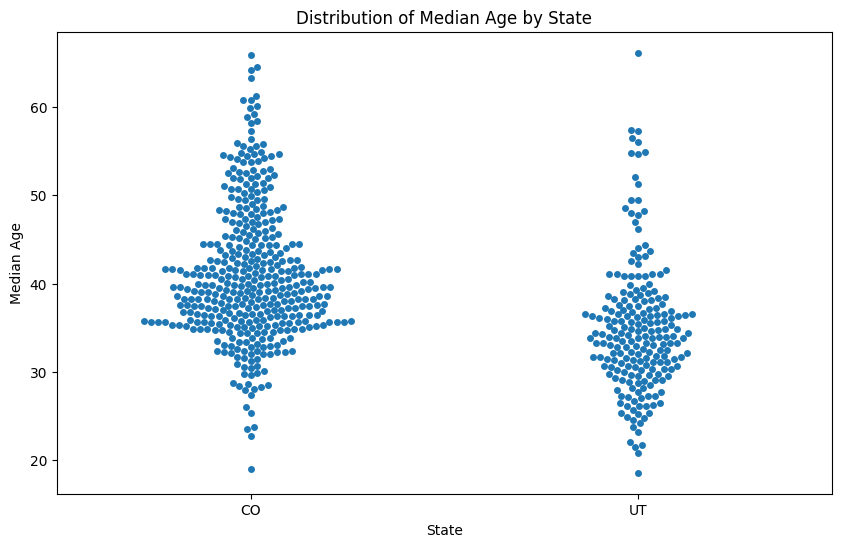

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.swarmplot(x='state', y='median_age', data=df)
plt.title('Distribution of Median Age by State')
plt.xlabel('State')
plt.ylabel('Median Age')

plt.show()


From this smarmplot it appears that there is a signficant difference between the distribution of median ages of Colorado and Utah; with Utah showing a much more balanced distribution. whereas Colorado is extremely heavily skewed towards older median age groups.

With each dot only representing a zipcode, however, this might be misleading, or limited.

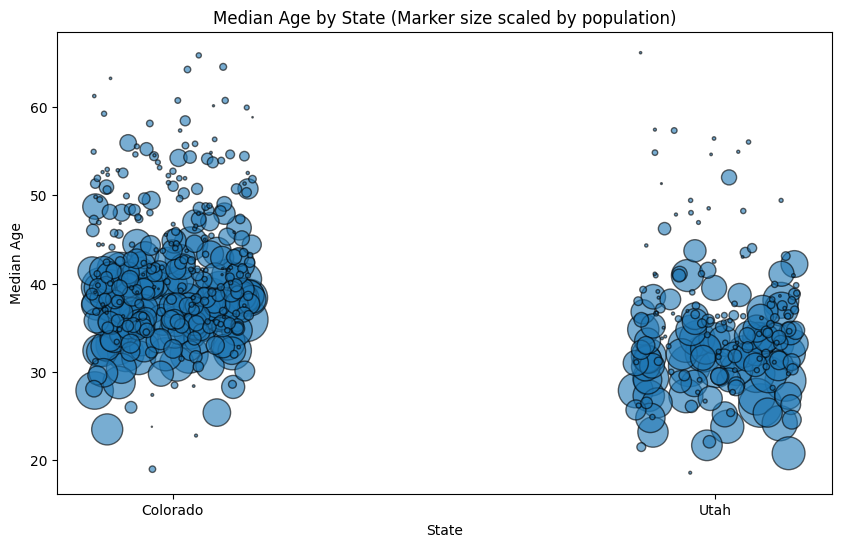

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Filter to valid rows
df = df.dropna(subset=['state', 'median_age', 'total_population'])

# 2. Map states to numeric values
state_mapping = {'CO': 0, 'UT': 1}
df['state_num'] = df['state'].map(state_mapping)

# If any rows failed mapping (NaN), drop them
df = df.dropna(subset=['state_num'])

# 3. Add random jitter
np.random.seed(42)
df['jitter'] = np.random.uniform(-0.15, 0.15, size=len(df))
df['x'] = df['state_num'] + df['jitter']

# 4. Scale marker size by population (simple linear scale)
#   - Adjust the divisor so points aren’t too big or too small
max_pop = df['total_population'].max()
df['marker_size'] = (df['total_population'] / max_pop) * 1000

# 5. Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['x'],
    df['median_age'],
    s=df['marker_size'],
    alpha=0.6,
    edgecolor='black'
)

# 6. Label axes and set ticks
plt.xticks([0, 1], ['Colorado', 'Utah'])  # or whatever your state names are
plt.xlabel('State')
plt.ylabel('Median Age')
plt.title('Median Age by State (Marker size scaled by population)')
plt.show()


This scaled scatterplot confirms what was seen in the initial diagram; that the difference between Colorado and Utah is not some statistical artifact of Zip Codes but in fact reflects a deep difference between the demographics of the two states.


Utah has a significantly younger shifted distribution for every age cohort. In Colorado you see a stark contrast, with the average age appearing to be somewhere in the 40s, whereas it appearas that Utah it's somewhere in the 30s or below.

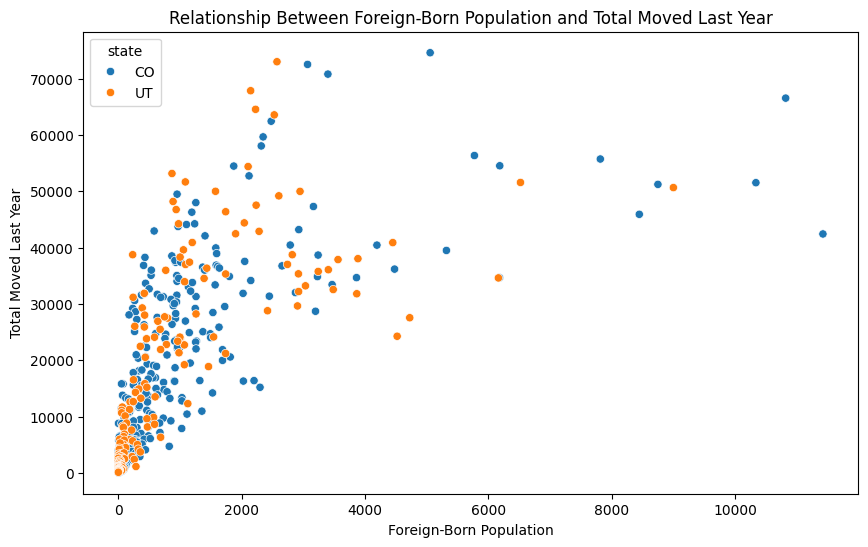

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='foreign_born_population',
    y='total_moved_last_year',
    hue='state',
    data=df
)
plt.title('Relationship Between Foreign-Born Population and Total Moved Last Year')
plt.xlabel('Foreign-Born Population')
plt.ylabel('Total Moved Last Year')


plt.show()

From this graph is appears that Utah has more Zipcodes that have low amounts of Foreign-Born population, beyond that it becomes a bit speculative to make assumptions based on the graph alone.

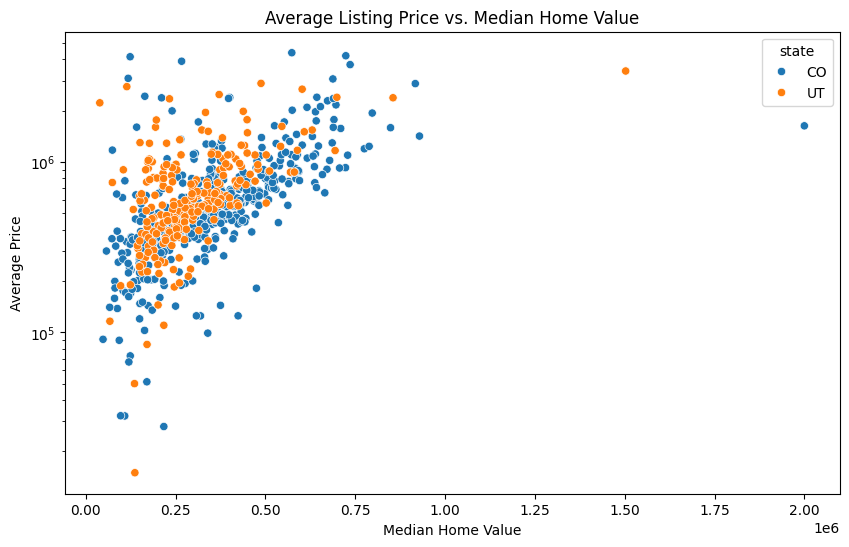

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='median_home_value',
    y='average_price',
    hue='state',
    data=df_clean
)
plt.title('Average Listing Price vs. Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Average Price')
# use log scale to reduce the squash
plt.yscale('log')
plt.show()


Based on this chart I can see that the Utah price/value of Homes is more concentrated on a centroid, whereas the Colorado values seems to exist all round it at other extremes.


From this I conclude that there is more variability and unpredictibility in the real estate market in Colorado vs. Utah.